In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt

In [ ]:
def calc_MSE(y_test,y_pred_lr, y_pred_ridge, y_pred_lasso):
  MSE = round(mean_squared_error(y_test, y_pred_lr), 4)
  MSE_Ridge = round(mean_squared_error(y_test, y_pred_ridge), 4)
  MSE_Lasso = round(mean_squared_error(y_test, y_pred_lasso), 4)
  print(f"MSE unregularized: {MSE}")
  print(f"MSE Ridge: {MSE_Ridge}")
  print(f"MSE Lasso: {MSE_Lasso}")

  return MSE, MSE_Ridge, MSE_Lasso

In [ ]:
def plot_coefficients(true_coeffs, lr, ridge, lasso, MSE, MSE_Ridge, MSE_Lasso):
  plt.figure(figsize=(10, 6))
  plt.plot(true_coeffs, label='True Coefficients', marker='o', linestyle='dashed', color='black', markerfacecolor='none')
  plt.plot(lr.coef_, label=f'Linear Regression Coefficients, MSE:{MSE}', marker='o', linestyle='-', color='blue', markerfacecolor='none')
  plt.plot(ridge.coef_, label=f'Ridge Coefficients, MSE: {MSE_Ridge}', marker='o', linestyle='-', color='green', markerfacecolor='none')
  plt.plot(lasso.coef_, label=f'Lasso Coefficients, MSE: {MSE_Lasso}', marker='o', linestyle='-', color='red', markerfacecolor='none')

  plt.legend()
  plt.title('True Coefficients vs. Linear Regression vs. Ridge vs. Lasso')
  plt.xlabel('Feature Index')
  plt.ylabel('Coefficient Value')
  plt.show()

MSE unregularized: 3.1638
MSE Ridge: 2.9426
MSE Lasso: 4.8308


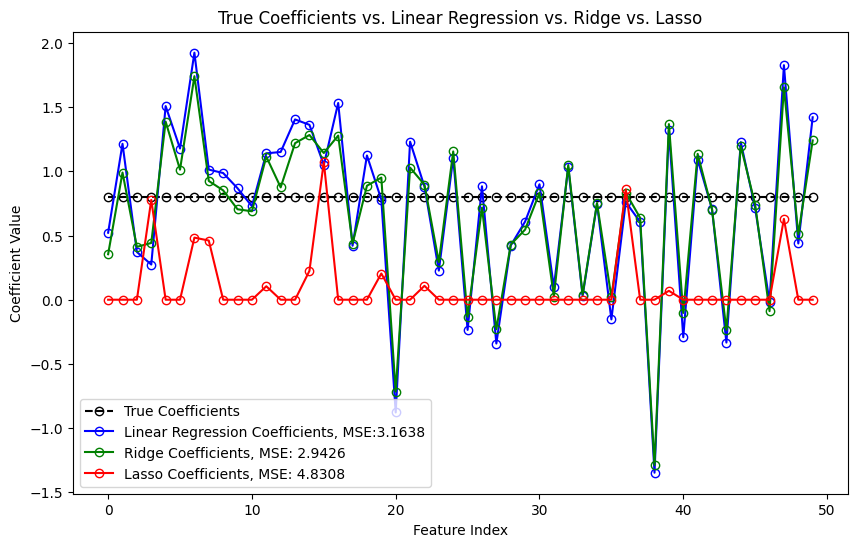

In [ ]:
np.random.seed(0)
n_features = 50
X = np.random.rand(100, n_features)
true_coeffs = np.zeros(n_features)
true_coeffs[0:] = 0.8  # All features are relevant
y = np.dot(X, true_coeffs) + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train linear regression and Lasso regression models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)  # Regularization strength for Lasso
ridge = Ridge(alpha=0.1)  # Regularization strength for Ridge

lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)


MSE, MSE_Ridge, MSE_Lasso = calc_MSE(y_test, y_pred_lr, y_pred_ridge, y_pred_lasso)
plot_coefficients(true_coeffs, lr, ridge, lasso, MSE, MSE_Ridge, MSE_Lasso)

MSE unregularized: 3.1638
MSE Ridge: 2.8829
MSE Lasso: 1.9871


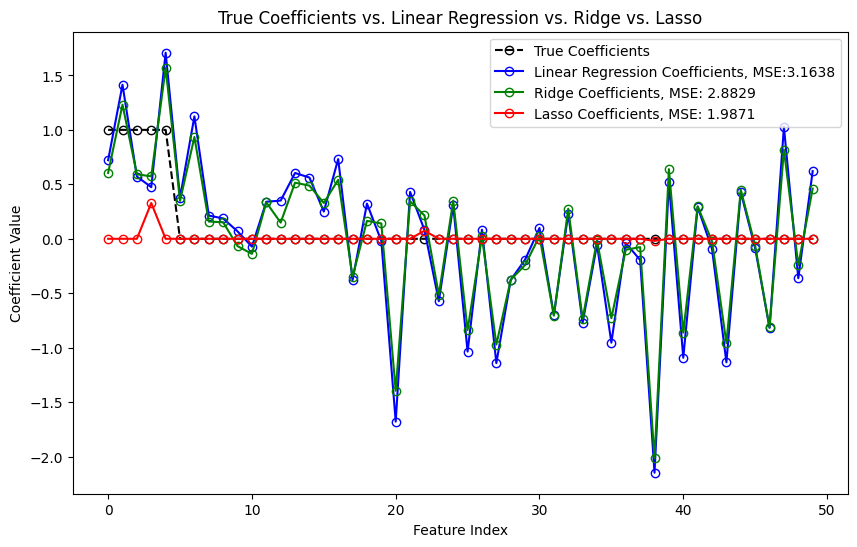

In [ ]:
# Generate synthetic data with many features and some noise
np.random.seed(0)
n_features = 50
X = np.random.rand(100, n_features)
true_coeffs = np.zeros(n_features)
true_coeffs[0:5] = 1.0  # Only the first 5 features are relevant
y = np.dot(X, true_coeffs) + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train linear regression and Lasso regression models
lr = LinearRegression()
ridge = Ridge(alpha=0.1)  # Regularization strength for Ridge
lasso = Lasso(alpha=0.1)  # Regularization strength for Lasso

lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)


MSE, MSE_Ridge, MSE_Lasso = calc_MSE(y_test, y_pred_lr, y_pred_ridge, y_pred_lasso)
plot_coefficients(true_coeffs, lr, ridge, lasso, MSE, MSE_Ridge, MSE_Lasso)